In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [4]:
df = pd.read_csv("hotel_bookings.csv", encoding = "unicode_escape")

Data Exploration and Cleaning

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# changing data type of reservation_status_date to datetime
df["reservation_status_date"] = df["reservation_status_date"].astype(np.datetime64)

In [ ]:
#finding unique values of all columns whose datatype is object
for columns in df.describe(include = "object"):
  print(columns)
  print(df[columns].unique())
  print("------------------")

In [8]:
#checking null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#dropping column with very high null values and deleting rows with null values which are not much high number
del[[df["agent"],df["company"]]]


In [10]:
df.dropna(inplace = True)

In [ ]:
df.describe()

In [12]:
#as you can see max value in adr is 5400 which is outliner so you want to remove it
df = df[df["adr"] < 5400]

Data Analysis and Visualizations

In [13]:
data1 = df["is_canceled"].value_counts(normalize = True)

In [14]:
data1

no     0.628653
yes    0.371347
Name: is_canceled, dtype: float64

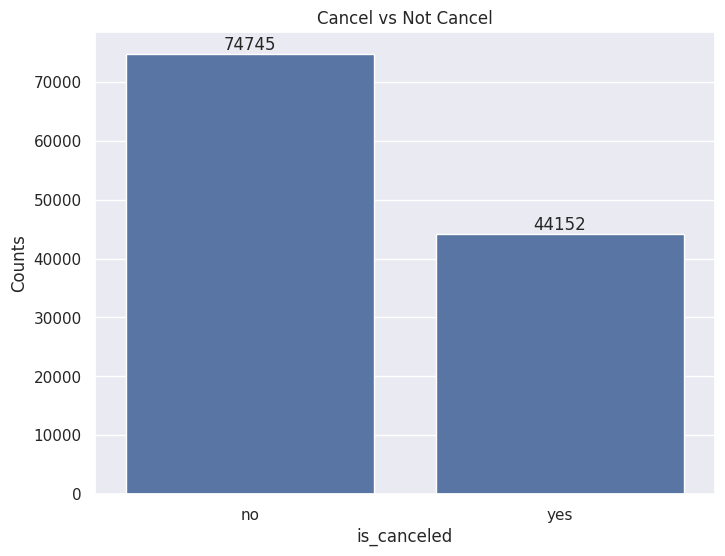

In [37]:
#barplot showing canceled reservations and not-canceled reservations
ax = sb.countplot(x = "is_canceled", data = df)
plt.title("Cancel vs Not Cancel")
plt.ylabel("Counts")
for bars in ax.containers:
  ax.bar_label(bars)


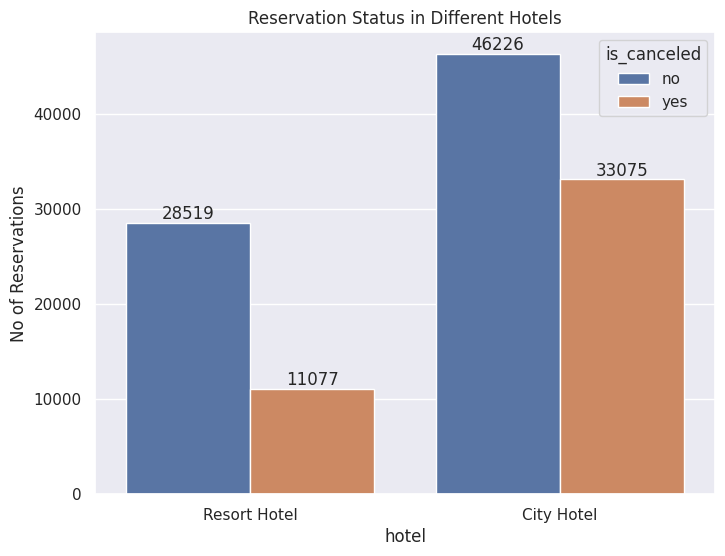

In [38]:
#clustered column chart showing resevation status in different hotels
qw = sb.countplot(x = "hotel", hue = "is_canceled", data = df)
sb.set(rc = {"figure.figsize" : (7,6)})
plt.ylabel("No of Reservations")
plt.title("Reservation Status in Different Hotels")
for bars in qw.containers:
  qw.bar_label(bars)

In [17]:
#distribution of cancelled and non canceled reservations in both type of hotels
resort_hotel = df[df["hotel"] == "Resort Hotel"]
city_hotel = df[df["hotel"] == "City Hotel"]

In [18]:
resort = resort_hotel["is_canceled"].value_counts()

([<matplotlib.patches.Wedge at 0x795bb48611b0>,
 [Text(-0.7018306071158671, 0.8470146391387657, 'no'),
  Text(0.7018306071158673, -0.8470146391387655, 'yes')],
 [Text(-0.3828166947904729, 0.46200798498478124, '72.0%'),
  Text(0.38281669479047303, -0.46200798498478113, '28.0%')])

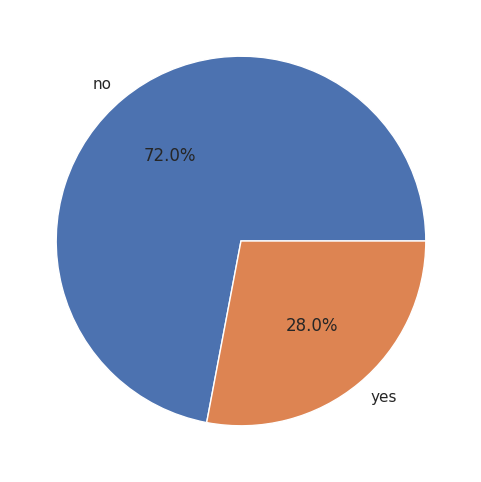

In [19]:
plt.pie(resort,labels = resort.index, autopct = "%1.1f%%")

In [20]:
city = city_hotel['is_canceled'].value_counts()

([<matplotlib.patches.Wedge at 0x795bb48c81c0>,
 [Text(-0.2833150820244359, 1.0628887826567215, 'no'),
  Text(0.28331498250960474, -1.0628888091825892, 'yes')],
 [Text(-0.15453549928605592, 0.5797575178127571, '58.3%'),
  Text(0.15453544500523891, -0.5797575322814122, '41.7%')])

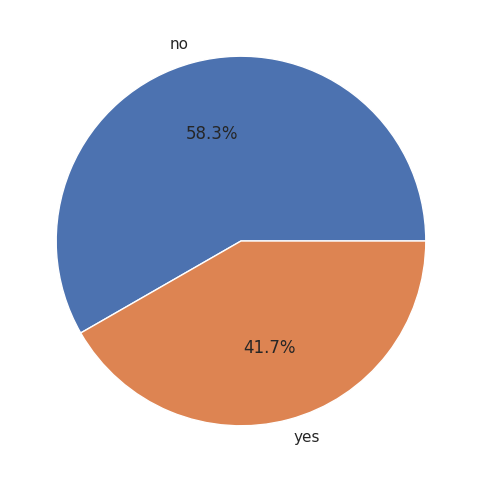

In [21]:
plt.pie(city, labels = city.index, autopct = "%1.1f%%")

In [ ]:
#from above pie charts we conclude the cancelation rate is much higher in city hotels compared to resprt hotels.

In [22]:
#showing average adr for both types of hotels vs date using scatter plot
rmean = resort_hotel.groupby('reservation_status_date').agg({"adr":"mean"})
cmean = city_hotel.groupby("reservation_status_date").agg({"adr":"mean"})

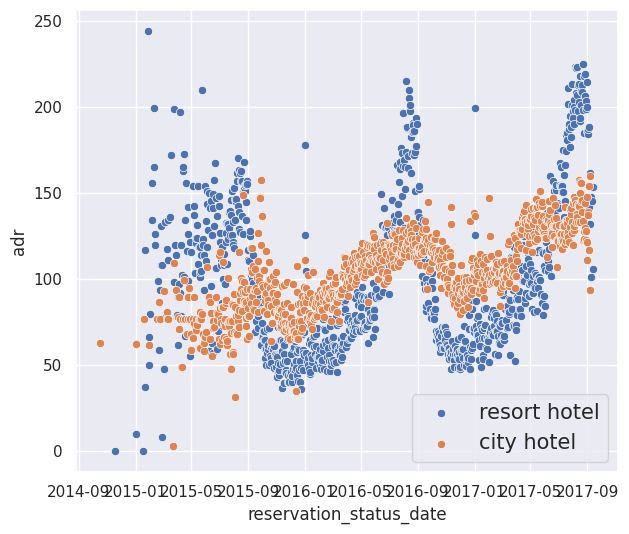

In [23]:
sb.scatterplot(x = rmean.index, y = rmean["adr"], label = "resort hotel")
sb.scatterplot(x = cmean.index, y = cmean["adr"], label = "city hotel")
plt.legend(fontsize = 15)
sb.set(rc = {"figure.figsize": (15,8)})

In [24]:
#adding month column from reservation_start_date column
df["month"] = df["reservation_status_date"].dt.month

Text(0, 0.5, 'Number of Reservations')

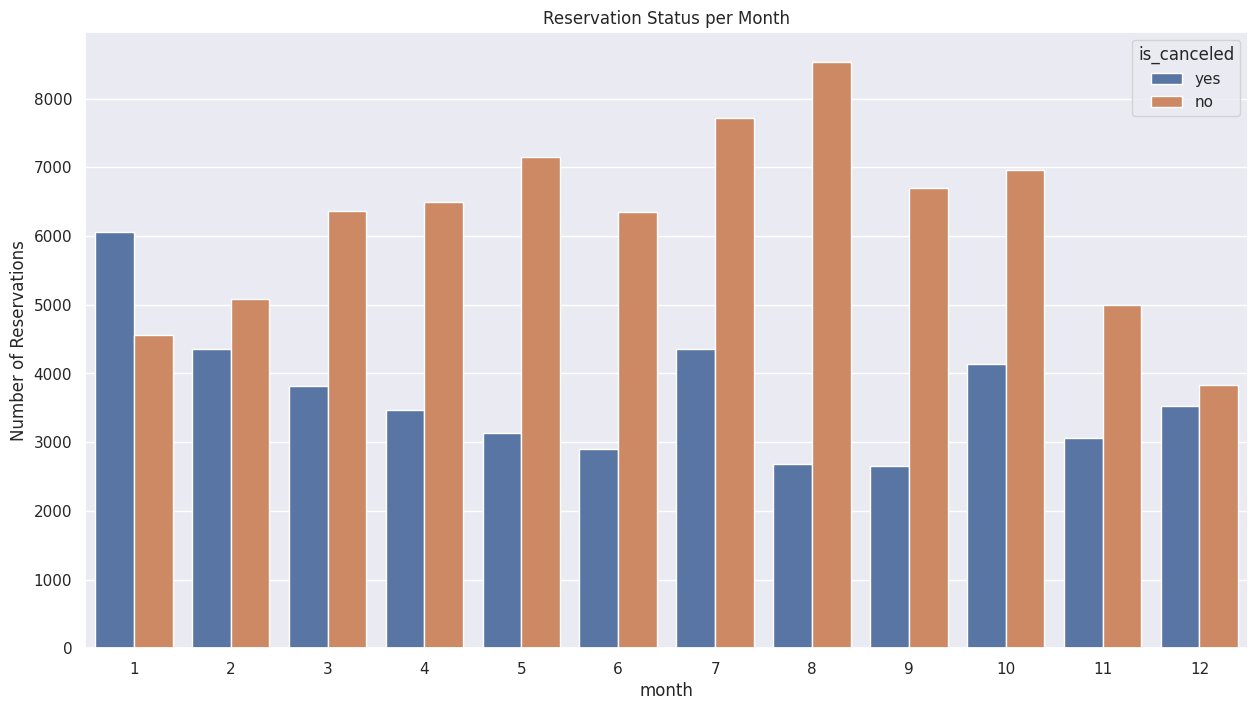

In [25]:
#per month count of canceled and non-canceled reservations
sb.countplot(x = df["month"],hue = "is_canceled", data = df)
plt.title("Reservation Status per Month")
plt.ylabel("Number of Reservations")

Text(0.5, 1.0, 'Average ADR per Month for Canceled Reservations')

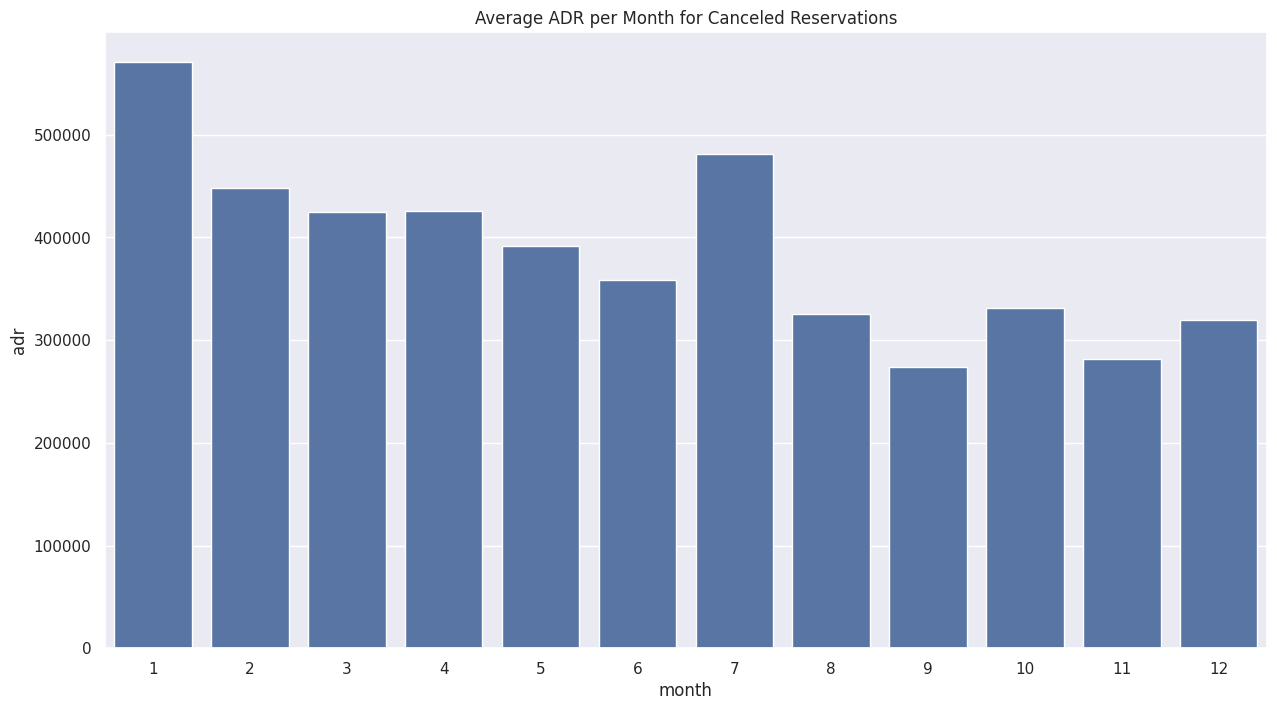

In [26]:
#average adr per month for cancelled reservations
data20 = df[df["is_canceled"] == "yes"]
data40 = data20.groupby("month").agg({"adr" : "sum"})
sb.barplot(x = data40.index, y = "adr", data = data40)
plt.title("Average ADR per Month for Canceled Reservations")

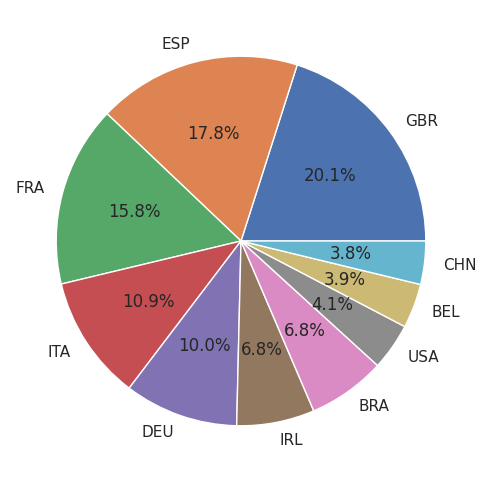

In [34]:
#top 10 countries having highest number of canceled reservations
top_10 = data20["country"].value_counts()
top10 = top_10[1:11]
plt.pie(top10, labels = top10.index, autopct = "%1.1f%%")
sb.set(rc = {"figure.figsize" : (8,6)})

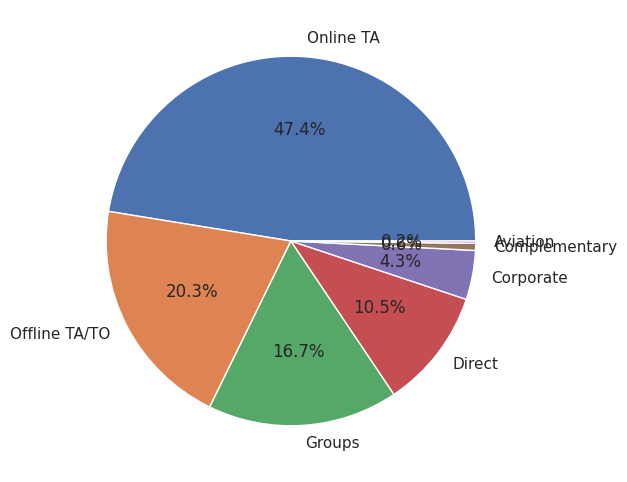

In [35]:
#number of reservations market segment wise
data100 =  df["market_segment"].value_counts()
plt.pie(data100, labels = data100.index, autopct = "%1.1f%%" )
sb.set(rc = {"figure.figsize": (8,6)})

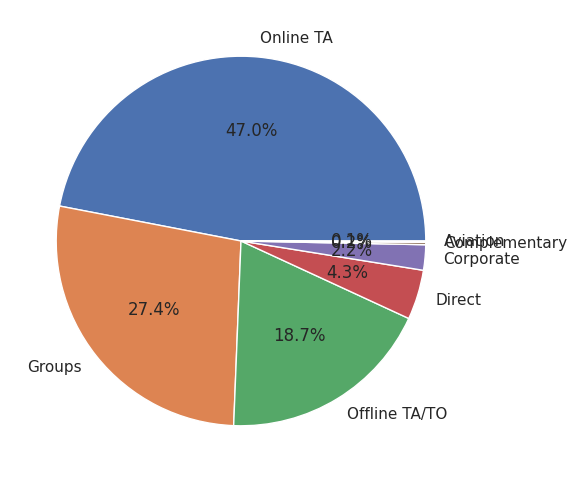

In [36]:
#number of canceled reservations market segment wise
data200 = data20["market_segment"].value_counts()
plt.pie(data200, labels = data200.index, autopct = "%1.1f%%")
sb.set(rc = {"figure.figsize": (8,6)})